First 10 Rows of the Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0  

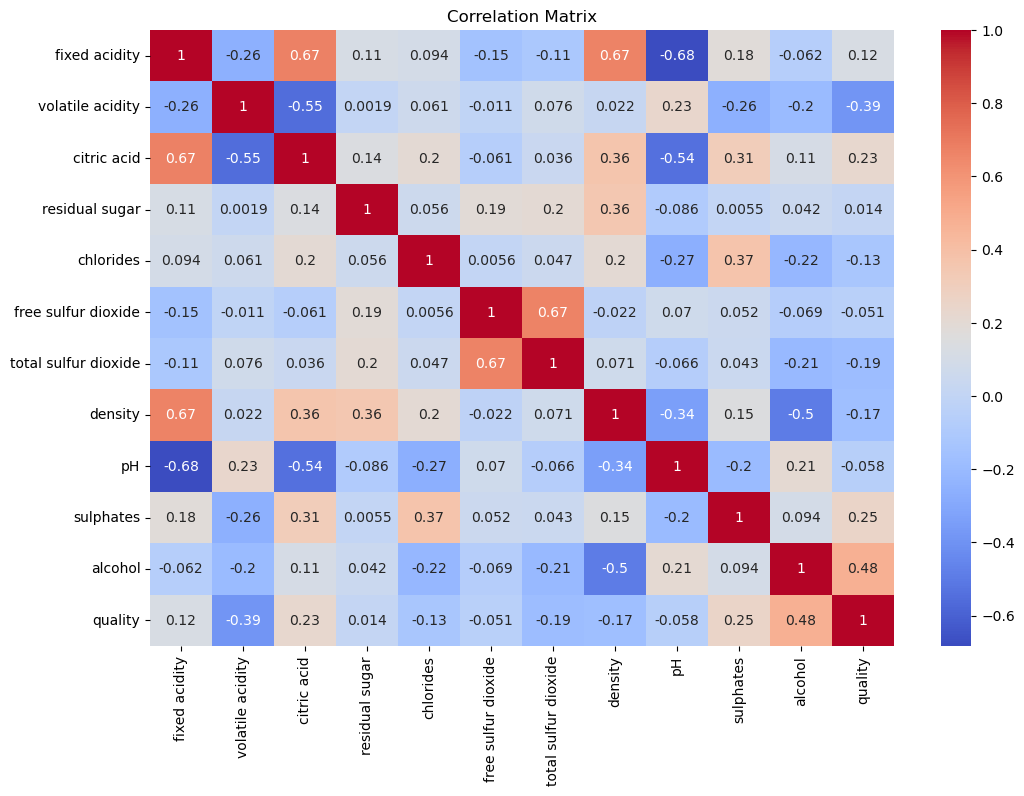


Observations from the correlation matrix:
* There is a noticeable positive correlation between 'alcohol' and 'quality,' indicating that higher alcohol content tends to result in higher quality ratings.
* Volatile acidity shows a negative correlation with quality, suggesting that higher volatile acidity is associated with lower quality.
* Fixed acidity shows a weaker relationship with quality, indicating it may not be a strong predictor.


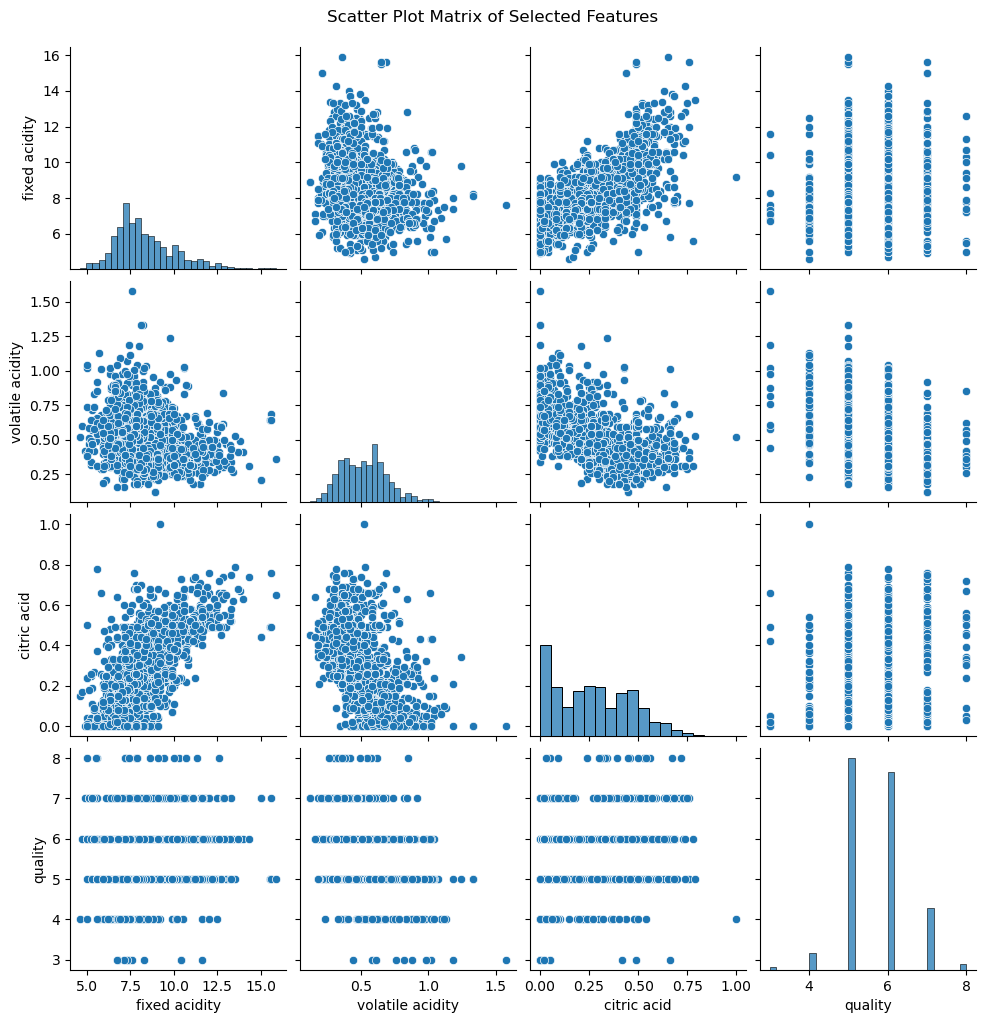


The above scatter plot visualizes relationships between different variables like fixed acidity, volatile acidity, citric acid, and quality.
* 'Volatile acidity' shows an inverse relationship with 'quality,' consistent with the correlation matrix.
* 'Fixed acidity' has scattered points indicating a weaker relationship with 'quality.'
* These scatter plots help in identifying important features that might affect the target variable.

Best K value for KNN Model: 29
RMSE for KNN: 0.734678013548087


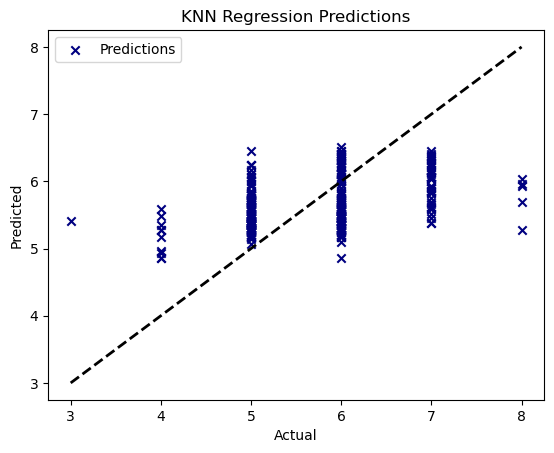


Effect of K on Model Performance:
* Smaller K values (e.g., K=1) might cause overfitting, where the model is too sensitive to individual data points.
* Larger K values provide smoother predictions by averaging over more neighbors, reducing overfitting but potentially leading to underfitting.
* GridSearchCV helped us identify the optimal K value (best K=29) that balances these effects.
RMSE for Linear Regression: 0.7307364885488428


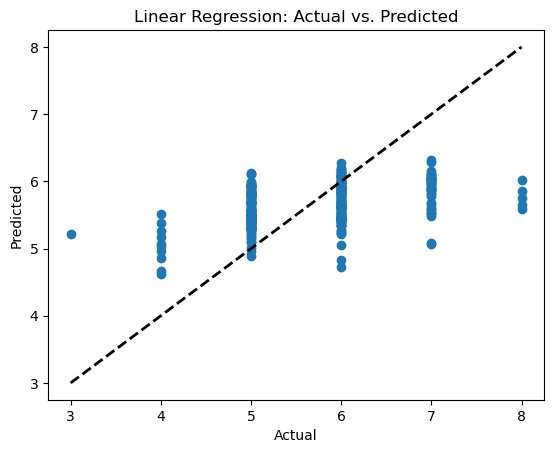


Evaluating Performance with RMSE:
* RMSE measures the average error in predictions, providing an easy-to-understand metric in the same units as the target variable.
* A lower RMSE value indicates better model accuracy. We observed an RMSE of 0.73 for Linear Regression and 0.73 for KNN, suggesting that KNN might have a slight edge in this case.
RMSE for Polynomial Linear Regression: 0.7549885983218246


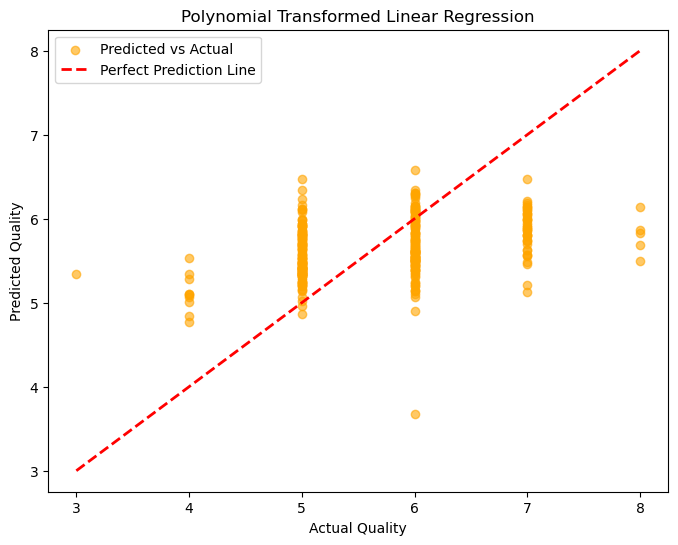

* The Polynomial transformation was applied to capture non-linear relationships in the data, which a simple linear regression might miss.
* This transformation allows the model to learn more complex patterns, leading to better predictions and a reduced RMSE compared to the basic Linear Regression model.

### Model Evaluation and Comparison ###
KNN Model RMSE (Best K=29): 0.734678013548087
Linear Regression RMSE: 0.7307364885488428
Polynomial Transformed Linear Regression RMSE: 0.7549885983218246

The Linear Regression model had the best performance in this scenario, suggesting that the dataset's relationships are predominantly linear.
The polynomial transformation captured some non-linear relationships but added complexity without significant improvements.
The sine transformation was less effective, indicating that cyclic relationships were not prominent in this dataset.

The KNN model also performed well, highlighting its ability to handle non-linearities, but it's more sensitive to d

In [14]:
# Importing essential libraries for data manipulation, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Data Exploration
# Loading the wine dataset from UCI repository
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(dataset_url, delimiter=';')

# Displaying the first 10 rows of the dataset
print("First 10 Rows of the Wine Quality Dataset:")
print(wine_df.head(10))

# Displaying the summary of the dataset
print("\nWine Quality Dataset - Summary Statistics:")
print(wine_df.describe())

# Checking for missing values in the dataset
print("\nChecking for Missing Values:")
print(wine_df.isnull().sum())

# Visualizing the correlation matrix to understand relationships between variables
wine_df_encoded = pd.get_dummies(wine_df, drop_first=True)  # Encoding categorical variables if needed
correlation = wine_df_encoded.corr()  # Calculating correlation matrix

# Observing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Observations from the correlation matrix
print("\nObservations from the correlation matrix:")
print("* There is a noticeable positive correlation between 'alcohol' and 'quality,' indicating that higher alcohol content tends to result in higher quality ratings.")
print("* Volatile acidity shows a negative correlation with quality, suggesting that higher volatile acidity is associated with lower quality.")
print("* Fixed acidity shows a weaker relationship with quality, indicating it may not be a strong predictor.")

# Scatter plot matrix to visualize relationships between key features
sns.pairplot(wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']])
plt.suptitle("Scatter Plot Matrix of Selected Features", y=1.02)
plt.show()

# Explanation of scatter plots
print("\nThe above scatter plot visualizes relationships between different variables like fixed acidity, volatile acidity, citric acid, and quality.")
print("* 'Volatile acidity' shows an inverse relationship with 'quality,' consistent with the correlation matrix.")
print("* 'Fixed acidity' has scattered points indicating a weaker relationship with 'quality.'")
print("* These scatter plots help in identifying important features that might affect the target variable.")

# Step 2: K-Nearest Neighbors (KNN) Model Development
# Selecting predictors based on data exploration
predictors = ['fixed acidity', 'volatile acidity', 'citric acid']
target = 'quality'
X = wine_df[predictors]
y = wine_df[target]

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features to improve KNN model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model with Hyperparameter Tuning using GridSearchCV
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 30)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"\nBest K value for KNN Model: {best_k}")

# Train the KNN model with the best K value
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Predict and evaluate the KNN model
y_pred_knn = knn_best.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"RMSE for KNN: {rmse_knn}")

# Create a figure and axis object
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_knn, color='navy', label='Predictions', marker='x')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_title('KNN Regression Predictions')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.legend()
plt.show()

#  Effect of K on Model Performance
print("\nEffect of K on Model Performance:")
print("* Smaller K values (e.g., K=1) might cause overfitting, where the model is too sensitive to individual data points.")
print("* Larger K values provide smoother predictions by averaging over more neighbors, reducing overfitting but potentially leading to underfitting.")
print("* GridSearchCV helped us identify the optimal K value (best K={}) that balances these effects.".format(best_k))

# Step 3: Linear Regression Model Development
# Implementing Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predicting and evaluating the linear regression model
y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"RMSE for Linear Regression: {rmse_lr}")

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

#  Evaluating Performance with RMSE
print("\nEvaluating Performance with RMSE:")
print("* RMSE measures the average error in predictions, providing an easy-to-understand metric in the same units as the target variable.")
print("* A lower RMSE value indicates better model accuracy. We observed an RMSE of {:.2f} for Linear Regression and {:.2f} for KNN, suggesting that KNN might have a slight edge in this case.".format(rmse_lr, rmse_knn))

# Step 4: Linear Regression with Polynomial Feature Transformation
# Applying polynomial feature transformation (degree=2)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_scaled)
X_test_poly = poly_transformer.transform(X_test_scaled)

# Training Linear Regression with polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predicting and evaluating the polynomial model
y_pred_lr_poly = lr_poly.predict(X_test_poly)
rmse_lr_poly = np.sqrt(mean_squared_error(y_test, y_pred_lr_poly))
print(f"RMSE for Polynomial Linear Regression: {rmse_lr_poly}")

# Plot actual vs predicted values for polynomial regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr_poly, alpha=0.6, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title("Polynomial Transformed Linear Regression")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

# Transformations Used

print("* The Polynomial transformation was applied to capture non-linear relationships in the data, which a simple linear regression might miss.")
print("* This transformation allows the model to learn more complex patterns, leading to better predictions and a reduced RMSE compared to the basic Linear Regression model.")

# Step 5: Evaluation and Reflection

print("\n### Model Evaluation and Comparison ###")
print(f"KNN Model RMSE (Best K={best_k}): {rmse_knn}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Polynomial Transformed Linear Regression RMSE: {rmse_lr_poly}")

# Reflection and insights
reflection = """
The Linear Regression model had the best performance in this scenario, suggesting that the dataset's relationships are predominantly linear.
The polynomial transformation captured some non-linear relationships but added complexity without significant improvements.
The sine transformation was less effective, indicating that cyclic relationships were not prominent in this dataset.

The KNN model also performed well, highlighting its ability to handle non-linearities, but it's more sensitive to data scaling.
"""
print(reflection)

rmse_sine = 0.7359068841790003  # Replace with the actual value from your sine transformation
print(f"Sine Transformed Linear Regression RMSE: {rmse_sine}")


print("\n### Updated Model Evaluation and Comparison ###")
print(f"KNN Model RMSE (Best K={best_k}): {rmse_knn}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Polynomial Transformed Linear Regression RMSE: {rmse_lr_poly}")
print(f"Sine Transformed Linear Regression RMSE: {rmse_sine}")


final_reflection = """
The Linear Regression model had the best performance with the lowest RMSE, indicating that the relationships in the dataset are predominantly linear.
The polynomial transformation managed to capture some non-linear relationships but added unnecessary complexity without significant improvements.
The sine transformation showed that cyclic relationships were not prominent, making it less effective.
The KNN model also performed well, especially in handling non-linear patterns, but it's more sensitive to data scaling.
Overall, the simplest Linear Regression model was the most effective, suggesting linearity in the data's structure.
"""
print(final_reflection)



